In [2]:
%matplotlib inline
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt

import theano
from theano import tensor as T, function

from IPython import display
import time

# A simple problem

In [3]:
# noise variance, controls how hard is the problem. The larger, the harder
noise_var = .5

# number of observations
n_samples = 100

n = np.random.normal(0, noise_var, n_samples)
x = np.arange(n_samples)
x = (x - x.mean())/x.std()

w, b = np.random.randn(2)
d = w*x+b # correct answer
y = d+n # noisy observation

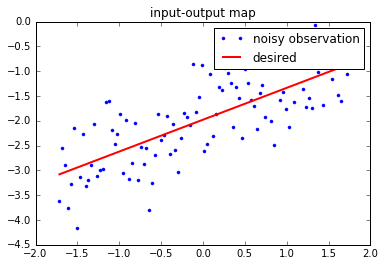

In [5]:
plt.plot(x, y, '.')
plt.plot(x, d, '-r', linewidth = 2.)
plt.legend(('noisy observation', 'desired'))
plt.title('input-output map')

# Theano model

In [6]:
X, Y = T.vectors('input', 'desired')
W = theano.shared(.01)
B = theano.shared(0.)
Z = W*X + B
Cost = ((Y-Z)**2).mean()
params = [W, B] # parameters that should be learned

# Changing Theano variables in place

In [7]:
W.get_value()

array(0.01)

In [8]:
W

<TensorType(float64, scalar)>

In [9]:
updates = ((W, W*2), )
double_w = function([], [], updates = updates)

In [10]:
double_w()
W.get_value()

array(0.02)

# Training the model

In [11]:
# cost = (d-y)**2
# updates:
# w = w - lr*grad(cost, w) = w + lr*2*(d-y)*x
# b = b - lr*grad(cost, b) = b + lr*2*(d-y)

lr = .1
grads = [T.grad(Cost, p) for p in params]
updates = [(p, p-lr*g) for p,g in zip(params, grads)]
print(updates)

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [12]:
train = function([X, Y], Cost, updates = updates)

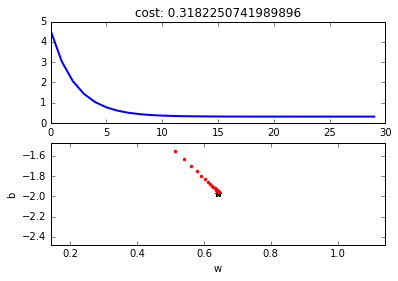

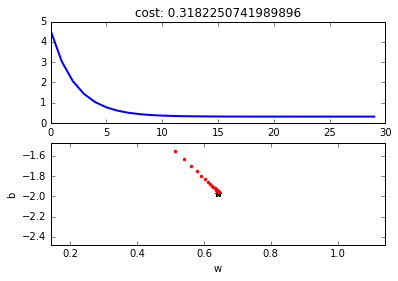

In [13]:
epochs = 30
final_cost = []
for i in range(epochs):
    # all we need to train model - to call train()
    final_cost.append(train(x, y))
    
    # extra niceties
    what, bhat = W.get_value(), B.get_value()
    
    # cost function
    plt.subplot(211)
    plt.cla()
    plt.title('cost: {}'.format(final_cost[-1]))
    plt.plot(final_cost, linewidth = 2.)
    
    #parameters space
    plt.subplot(212)
    plt.plot(w, b, '*', linewidth = 2.)
    plt.plot(what, bhat, '.r', linewidth = 2.)
    plt.xlim([w-.5, w+0.5])
    plt.ylim([b-.5, b+0.5])
    plt.xlabel('w')
    plt.ylabel('b')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)

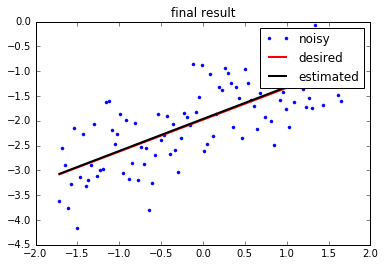

In [14]:
# estimated line
plt.title('final result')
plt.plot(x, y, '.')
plt.plot(x, d, 'r', linewidth = 2.)
plt.plot(x, what*x + bhat, 'k', linewidth = 2.)
plt.legend(('noisy', 'desired', 'estimated'))